In [1]:
import os
import pandas as pd
import seaborn as sns
from helper import WorkingPath

In [2]:
wpath = WorkingPath()

In [3]:
file_name = 'titanic.csv'
titanic_file = os.path.join(wpath.preparation_path(), 'titanic.csv')
titanic_df = pd.read_csv(titanic_file)

#### Check the columns 
- Explore the data columns name from the csv file

In [4]:
# check the column name
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Columns definition 
- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

https://github.com/awesomedata/awesome-public-datasets/issues/351

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# Find the number of null in dataframe
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_df['Age'].isnull().sum()

177

In [9]:
titanic_df.loc[titanic_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [10]:
# Add the child and adult classification here
def age_grouping(dataframe):
    _df = dataframe.copy()
    _df.loc[_df['Age'] <= 18, 'AgeGroup'] = 'child'
    _df.loc[_df['Age'] > 18, 'AgeGroup'] = 'adult'
    return _df

In [11]:
# select the required columns to analysis
sel_cols = ['Pclass', 'Sex', 'Ticket', 
            'Cabin', 'Embarked', 'Age',
            'AgeGroup', 'Fare','Survived']

In [12]:
titanic_df_mod = age_grouping(titanic_df)[sel_cols]

In [13]:
titanic_df_mod

,Pclass,Sex,Ticket,Cabin,Embarked,Age,AgeGroup,Fare,Survived
0,3,male,A/5 21171,NaN,S,22.0,adult,7.2500,0
1,1,female,PC 17599,C85,C,38.0,adult,71.2833,1
2,3,female,STON/O2. 3101282,NaN,S,26.0,adult,7.9250,1
3,1,female,113803,C123,S,35.0,adult,53.1000,1
4,3,male,373450,NaN,S,35.0,adult,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,2,male,211536,NaN,S,27.0,adult,13.0000,0
887,1,female,112053,B42,S,19.0,adult,30.0000,1
888,3,female,W./C. 6607,NaN,S,NaN,NaN,23.4500,0
889,1,male,111369,C148,C,26.0,adult,30.0000,1


In [14]:
# classified based on class 
first_df = titanic_df_mod.loc[titanic_df_mod['Pclass']==1]
second_df = titanic_df_mod.loc[titanic_df_mod['Pclass']==2]
third_df = titanic_df_mod.loc[titanic_df_mod['Pclass']==3]

In [15]:
first_df.shape[0]

216

In [16]:
second_df.shape[0]

184

In [17]:
third_df.shape[0]

491

In [18]:
titanic_df_mod

,Pclass,Sex,Ticket,Cabin,Embarked,Age,AgeGroup,Fare,Survived
0,3,male,A/5 21171,NaN,S,22.0,adult,7.2500,0
1,1,female,PC 17599,C85,C,38.0,adult,71.2833,1
2,3,female,STON/O2. 3101282,NaN,S,26.0,adult,7.9250,1
3,1,female,113803,C123,S,35.0,adult,53.1000,1
4,3,male,373450,NaN,S,35.0,adult,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,2,male,211536,NaN,S,27.0,adult,13.0000,0
887,1,female,112053,B42,S,19.0,adult,30.0000,1
888,3,female,W./C. 6607,NaN,S,NaN,NaN,23.4500,0
889,1,male,111369,C148,C,26.0,adult,30.0000,1


In [19]:
missing_values = (titanic_df_mod.isnull().sum()/titanic_df_mod.shape[0]  *100).sort_values(ascending = False)

In [20]:
missing_values

Cabin       77.104377
Age         19.865320
AgeGroup    19.865320
Embarked     0.224467
Pclass       0.000000
Sex          0.000000
Ticket       0.000000
Fare         0.000000
Survived     0.000000
dtype: float64

### survival rate
- based on gender 
- based on class 
- based on AgeGroup

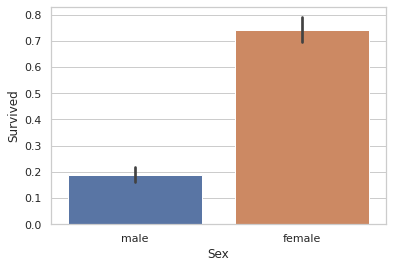

In [21]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Sex", y="Survived", data=titanic_df_mod)

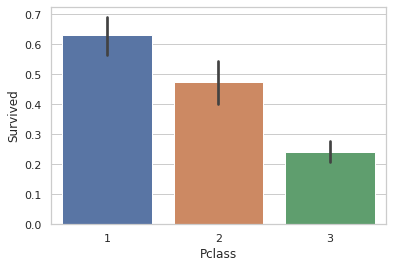

In [22]:
ax = sns.barplot(x="Pclass", y="Survived", data=titanic_df_mod)

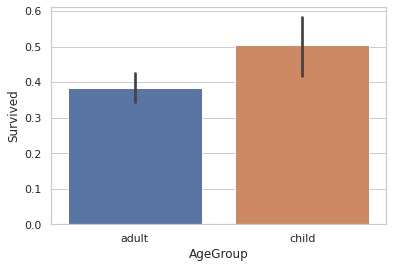

In [23]:
ax = sns.barplot(x="AgeGroup", y="Survived", data=titanic_df_mod)

#### stats 
- mean value 
- min count 
- max count 
- null effects 

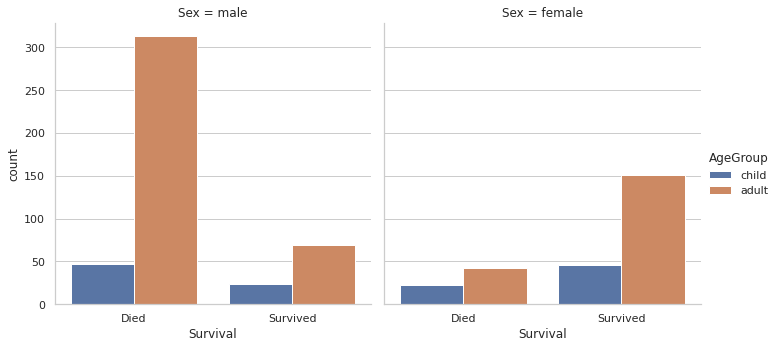

In [24]:
ax = sns.catplot(col="Sex", x="Survived", hue="AgeGroup", 
                 data=titanic_df_mod.sort_values(by='Age'), kind='count')
ax.set(xlabel="Survival", xticklabels=['Died', 'Survived'])

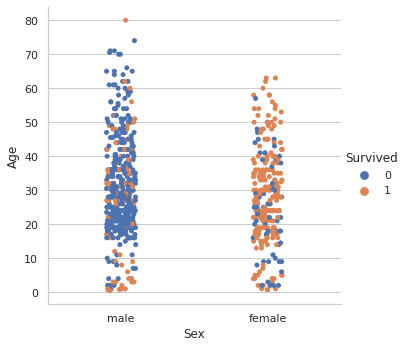

In [25]:
ax = sns.catplot(y="Age", x="Sex", hue="Survived", data=titanic_df_mod)

<AxesSubplot:xlabel='AgeGroup', ylabel='Fare'>

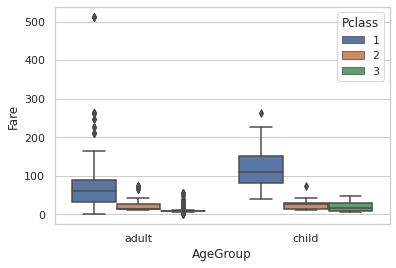

In [27]:
sns.boxplot(x = titanic_df_mod["AgeGroup"], y = titanic_df_mod["Fare"],hue = titanic_df_mod["Pclass"])

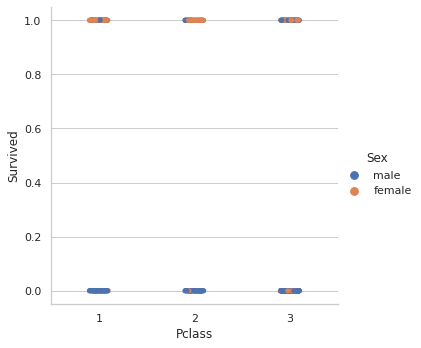

In [31]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df_mod)

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


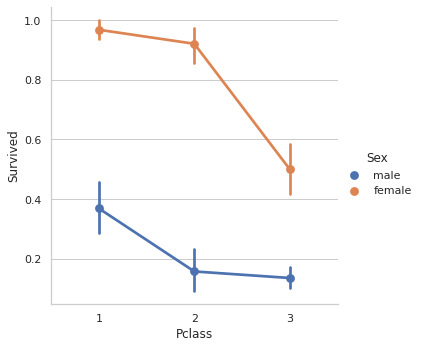

In [32]:
sns.factorplot('Pclass','Survived',hue='Sex',data=titanic_df_mod)

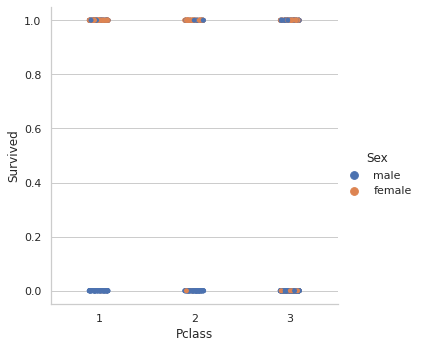

In [33]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df_mod, kind='strip')

<AxesSubplot:xlabel='Age', ylabel='Density'>

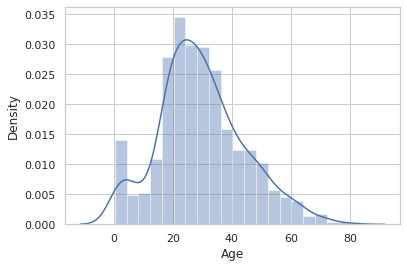

In [39]:
sns.distplot(titanic_df_mod['Age'])

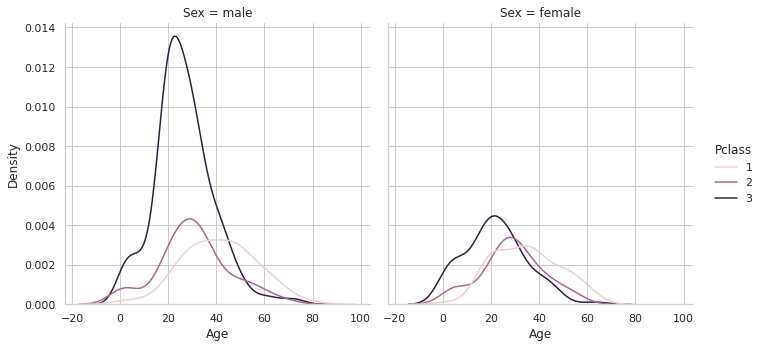

In [41]:
sns.displot(data=titanic_df_mod, x = 'Age', hue='Pclass', col='Sex', kind='kde')

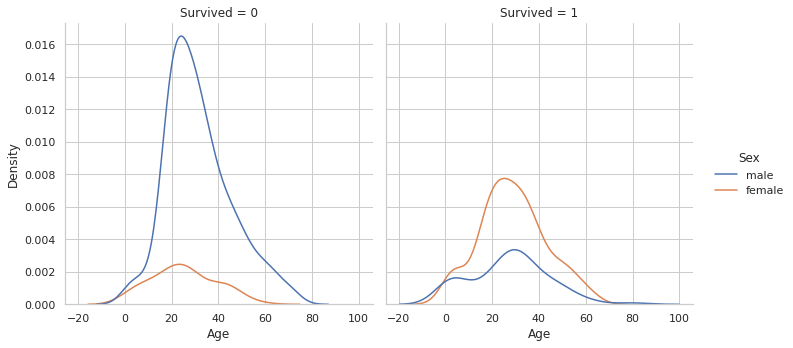

In [43]:
sns.displot(data=titanic_df_mod, x = 'Age', hue='Sex', col='Survived', kind='kde')